# Building the DataSets

This notebook provides instructions on creating the datasets for training Parametric Quantum Circuits (**PQC**). As explained in **14_qml4var_Intro.ipynb**, in addition to using a **CDF** for sampling the training data, it is also necessary to construct a function to generate the empirical cumulative distribution function (**ECDF**).

In [ ]:
import sys 
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import product

## 1. Empirical Distribution Function.

Given a dataset with $K$ samples:

$$\{\textbf{x}^k\}, \; k=0,1, \cdots,K-1$$

where each sample is m-dimensional, i.e $\textbf{x}=\{x_0, x_1, \cdots x_{m-1}\}$, the corresponding **ECDF** can be calculated as:


$$F^*_{\text{emp}}(\textbf{x}) = \dfrac{1}{K}\sum_{k = 0}^{K - 1}\textbf{1}_{\textbf{x}^k\leq \textbf{x}}.$$ 


where $\textbf{1}_{\textbf{x}^k\leq \textbf{x}}$ is an indicator function equals to 1 if $\textbf{x}^k \leq \textbf{x}$ and 0 otherwise.

The *empirical_cdf* from **QQuantLib.qml4var.data_utils** can be used to compute the corresponding **ECDF** for a given input data.


In [ ]:
from QQuantLib.qml4var.data_utils import empirical_cdf

In [ ]:
n_points_train = 10
number_of_features = 1

In [ ]:
x_train = np.random.normal(size=(n_points_train, number_of_features))
#x_train = np.random.randn(n_points_train)
emp_train = empirical_cdf(x_train)

In [ ]:
domain = np.arange(-4, 4, 8/100)
cdf_normal = norm.cdf(domain)
plt.plot(domain, cdf_normal, '-')
plt.plot(x_train, emp_train, 'o')
plt.legend(["CDF", "Empirical CDF"])

When more samples are used to compute the **ECDF**, it becomes a closer approximation to the original **CDF**.

In [ ]:
n_points_train = 200
number_of_features = 1
x_train = np.random.normal(size=(n_points_train, number_of_features))
#x_train = np.random.randn(n_points_train)
emp_train = empirical_cdf(x_train)
plt.plot(domain, cdf_normal, '-')
plt.plot(x_train, emp_train, 'o')
plt.legend(["CDF", "Empirical CDF"])

### 2D example


The *empirical_cdf* function from **QQuantLib.qml4var.data_utils** is versatile and can compute the ECDF for datasets with varying numbers of features. To illustrate its functionality, we can plot an example using a dataset with 2D input features, which allows for a clear visual representation.

In [ ]:
# Computes ECDF
n_points_train = 20
number_of_features = 2
x_train2D = np.random.normal(size=(n_points_train, number_of_features))
emp_train2D = empirical_cdf(x_train2D)

In [ ]:
# Computes True CDF
from scipy.stats import multivariate_normal
means_ = [0]*number_of_features
covs_ = [[int(i==j) for j in range(number_of_features)] for i in range(number_of_features)]
var = multivariate_normal(mean=means_, cov=covs_)
domain2d = np.linspace([-2] * number_of_features , [2] * number_of_features, 100)
domain2d = np.array(list(product(*[domain2d[:,i] for i in range(domain2d.shape[1])])))
cdf_2D = var.cdf(domain2d)
# Plot in 3d
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
ax1.plot3D(x_train2D[:, 0], x_train2D[:, 1], emp_train2D, 'o')
ax1.plot3D(domain2d[:, 0], domain2d[:, 1], cdf_2D, '-', alpha=0.5)
ax1.view_init(elev=21, azim=-170)

Again when more samples are provided closer the approximation

In [ ]:
# Computes ECDF
n_points_train = 2000
number_of_features = 2
x_train2D = np.random.normal(size=(n_points_train, number_of_features))
emp_train2D = empirical_cdf(x_train2D)
# Plot in 3d
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')

ax1.plot3D(x_train2D[:, 0], x_train2D[:, 1], emp_train2D, 'o')
ax1.plot3D(domain2d[:, 0], domain2d[:, 1], cdf_2D, '-', alpha=0.8)
ax1.view_init(elev=10, azim=-170)

## 2. DataSets

To perform tests with the **QQuantLib.qml4var** package two different datasets will be created:

* Random Dataset.
* Black-Scholes Dataset.

Both datasets can be generated using the data_sets module from the **benchmark.qml4var** package, which is part of the *FinancialApplications* software library.


### 2.1 Random Dataset

The function *create_random_data* from the **benchmark.qml4var.data_sets** module generates training and testing datasets for a random **CDF**. The inputs for the function include the following keyword arguments:

* n_points_train : number of points for the training dataset.
* n_points_test : number of points for the testing dataset.
* minval : minimum value for the testing dataset.
* maxval : maximum value for the testing dataset.
* features_number:  number of features.

The *minval* and *maxval* define the domain range, which ensures that the generated data points lie within this interval.

The function returns:

* train_x : samples obtained from the random **CDF** (this will be the features of the training dataset). 
    * *shape = (n_points_train, features_number)*
* train_y : these are the labels (or targets) for the training data computed using the *empirical_cdf* function from **QQuantLib.qml4var.data_utils**. 
    * *shape = (n_points_train, 1)*
* test_x: features for the testing dataset for the random **CDF** within the domain defined by *minval* and *maxval*.
    * *shape = (n_points_test, features_number)*
* test_y: labels (or targets) for the testing dataset, generated directly using the actual random CDF (not the empirical distribution). 
    * *shape = (n_points_test, 1)*
 

The *test_x and the *test_y* are a discretization (with *n_points_test*) over the desired domain (defined by *minval* and *maxval*) of the random **CDF**.

In [ ]:
from benchmark.qml4var.data_sets import create_random_data

In [ ]:
cfg_random = {
    "n_points_train": 10, 
    "n_points_test" : 100,
    "minval" : -np.pi,
    "maxval" : np.pi,
    "features_number" : 1
}
random_x_train, random_y_train, random_x_test, random_y_test = create_random_data(
    **cfg_random
)

In [ ]:
print(random_x_train.shape)
print(random_y_train.shape)
print(random_x_test.shape)
print(random_y_test.shape)

In [ ]:
plt.plot(random_x_train, random_y_train, "o")
plt.plot(random_x_test, random_y_test, "-")
plt.xlabel("Domain")
plt.ylabel("CDF")
plt.legend(["Training Dataset", "Testing Dataset"])
plt.title("Random Dataset")

The typycal output of the *create_random_data* function is shown in the following graph:


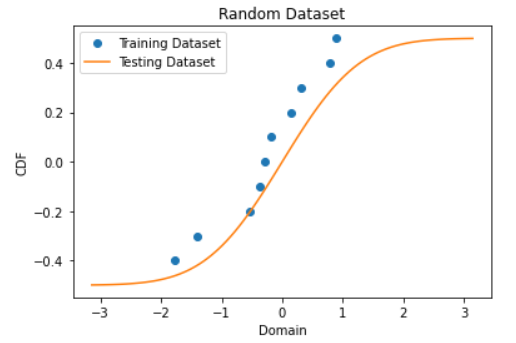

The $x$-values of the training data (represented by blue dots) are generated by sampling from the random **CDF**, while the corresponding $y$-values are obtained using the **ECDF**. On the other hand, the test data (represented by the orange line) corresponds to the random **CDF** over the specified domain, which is defined by the *minval* and *maxval* values.

Additionally the *create_random_data* can deal with multiple features.

**BE AWARE**

When more than 1 features are used the testing data will provide the cartesian product for each feature domain. So if yo want 100 points for testing dataset and want 2 features the testing dataset will have 10000 samples!

In [ ]:
cfg_random = {
    "n_points_train": 1000, 
    "n_points_test" : 100,
    "minval" : -np.pi,
    "maxval" : np.pi,
    "features_number" : 2
}
random_x_train, random_y_train, random_x_test, random_y_test = create_random_data(
    **cfg_random
)

In [ ]:
print(random_x_test.shape)

In [ ]:
# Plot in 3d
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1,projection='3d')

ax1.plot3D(random_x_train[:, 0], random_x_train[:, 1], random_y_train[:,0], 'o')
ax1.plot3D(random_x_test[:, 0], random_x_test[:, 1], random_y_test[:,0], '-', alpha=0.7)
ax1.view_init(elev=20, azim=-167)

### 2.2 create_bs_data

This function generates the training and testing dataset for a **Black-Scholes (BS)** (a log normal) **CDF**. 

In addition to the arguments that can be provided to the *create_random_data*, the folllowing arguments can be provided to configure the **BS** distribution.

* s_0 : initial value of the stock
* risk_free_rate: risk free rate
* volatility: volatility of the stock
* maturity: maturity of the stock


The function returns:

* x_train : these are samples obtained from the configured **BS CDF**.
    * *shape = (n_points_train, 1)*
* y_train : these are the labels (or targets) for the x_train. These labels were obtained by using an **empirical distribtution function** (see  https://en.wikipedia.org/wiki/Empirical_distribution_function) on the x_train data (function *empirical_distribution_function* from **datasets** module).
    * *shape = (n_points_train, 1)*
* x_test: this is the data obtained from the **BS CDF** between the domain defined by *minval* and *maxval*.
    * *shape = (n_points_test, 1)*
* y_test: these are the labels (or targets) for the x_test. In this case we **DO NOT** use the empirical distribtution function. We use the actual **BS CDF** for generating it.
    * *shape = (n_points_test, 1)*


The *x_test* and the *y_test* are the discretization (with *n_points_test*) over the desired domain (defined by *minval* and *maxval*) of the **BS CDF**.

The user can provide a keyword arguments to the function. The user can find a JSON file for configuring in an easy way the the Black-Scholes distribution dataset (*bs.json*)

**BE AWARE**

Only for 1 input feature!!!

In [ ]:
from benchmark.qml4var.data_sets import create_bs_data

In [ ]:
import json

Some configuration JSONs for **BS** (and for random) can be found in the *benchmark/qml4var/JSONs/* folder of the *FinancialApplications*. We are going to use the *bs.json* for directly load the configuration:

In [ ]:
bs_json = "../../benchmark/qml4var/JSONs/bs.json"
with open(bs_json) as json_file:
    bs_cfg = json.load(json_file)
bs_cfg

In [ ]:
bs_x_train, bs_y_train, bs_x_test, bs_y_test = create_bs_data(**bs_cfg)   
plt.plot(bs_x_train, bs_y_train, 'o')
plt.plot(bs_x_test, bs_y_test, '-')
plt.xlabel("Domain")
plt.ylabel("CDF")
plt.legend(["Train", "Test"])
plt.title("Black-Scholes")

In [ ]:
bs_y_test.shape

The typycal output of the *create_bs_data* function is showed in the following graph:

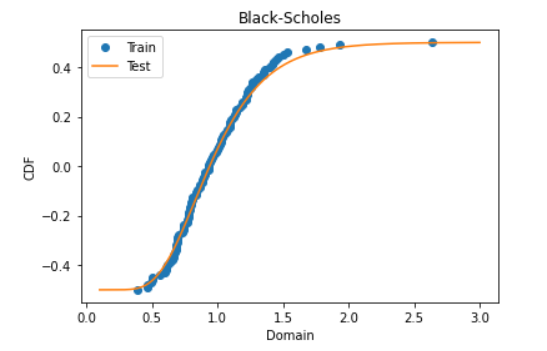

## 3. data_sets.py command line usage

The module *data_sets* can be used directly from command line for generating and store the datasets in a desired location.

For getting a help the user can execute: 

    python data_sets.py -h

    usage: data_sets.py [-h] [-json JSON_ARG] [-folder FOLDER_PATH] [-base_name BASE_NAME]
                        [--save]

    optional arguments:
      -h, --help            show this help message and exit
      -json JSON_ARG        JSON file with the data configuration
      -folder FOLDER_PATH   Path for storing data
      -base_name BASE_NAME  Base name for csv with datasets
      --save                For saving datasets

Example:

    python data_sets.py -json bs.json -folder ./dataset_folder -base_name data_01 --save
    
    This command will use the JSON file bs.json to build a dataset using the **BS CDF**. The data will be saved under the *dataset_folder*. The generated files will be: data_01_training.csv, and data_01_testing.csv. 
    
Inside the JSONs files a key called *distribution* should be provided. Depending on the value a random (*random* value) or a **BS** (*bs* value) **CDF** will be generated.